#Project


##Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn import linear_model
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import seaborn as sns
from sklearn.impute import SimpleImputer
from scipy import stats
import statsmodels.api as sm
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

##Data Dictionary

|variable     |class     |description  |
|:------------|:---------|:------------|
|stock_symbol |character |stock_symbol |
|date         |double    |date         |
|open         |double    |The price at market open.|
|high         |double    |The highest price for that day.|
|low          |double    |The lowest price for that day.|
|close        |double    |The price at market close, adjusted for splits.|
|adj_close    |double    |The closing price after adjustments for all applicable splits and dividend distributions. Data is adjusted using appropriate split and dividend multipliers, adhering to Center for Research in Security Prices (CRSP) standards.|
|volume       |double    |The number of shares traded on that day.|

##Data Importing

In [ ]:
stock = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2023/2023-02-07/big_tech_stock_prices.csv', header='infer')

#Displaying the data details
stock

,stock_symbol,date,open,high,low,close,adj_close,volume
0,AAPL,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.515213,493729600
1,AAPL,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.526476,601904800
2,AAPL,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.422664,552160000
3,AAPL,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.410790,477131200
4,AAPL,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.453412,447610800
...,...,...,...,...,...,...,...,...
45083,TSLA,2022-12-22,136.000000,136.630005,122.260002,125.349998,125.349998,210090300
45084,TSLA,2022-12-23,126.370003,128.619995,121.019997,123.150002,123.150002,166989700
45085,TSLA,2022-12-27,117.500000,119.669998,108.760002,109.099998,109.099998,208643400
45086,TSLA,2022-12-28,110.349998,116.269997,108.239998,112.709999,112.709999,221070500


#Exploratory Data Analysis:

##Checking for missing values


In [ ]:
# Display basic information about the dataset
print(stock.info())

# Describe missing values
missing_values = stock.isnull().sum()
print("Missing Values:")
print(missing_values)

# Percentage of missing values in each column
missing_percentage = (missing_values / len(stock)) * 100
print("\nPercentage of Missing Values:")
print(missing_percentage)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45088 entries, 0 to 45087
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   stock_symbol  45088 non-null  object 
 1   date          45088 non-null  object 
 2   open          45088 non-null  float64
 3   high          45088 non-null  float64
 4   low           45088 non-null  float64
 5   close         45088 non-null  float64
 6   adj_close     45088 non-null  float64
 7   volume        45088 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 2.8+ MB
None
Missing Values:
stock_symbol    0
date            0
open            0
high            0
low             0
close           0
adj_close       0
volume          0
dtype: int64

Percentage of Missing Values:
stock_symbol    0.0
date            0.0
open            0.0
high            0.0
low             0.0
close           0.0
adj_close       0.0
volume          0.0
dtype: float64


##Time series visualization of the data


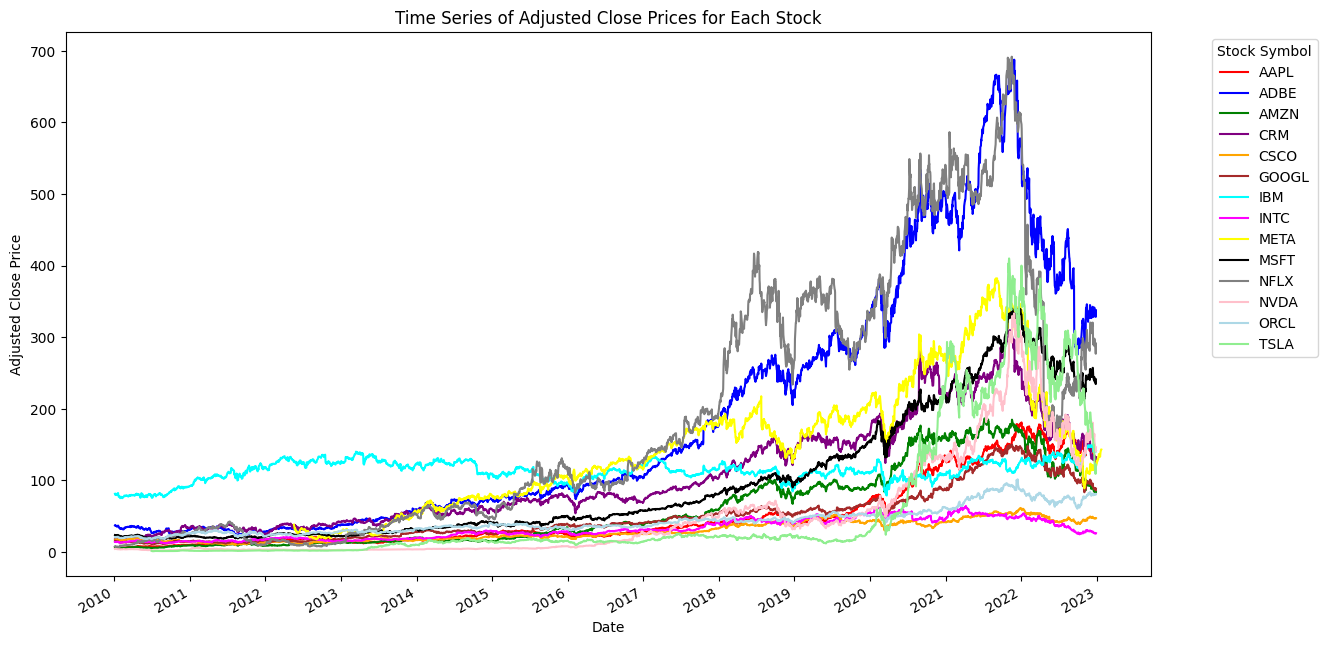

In [ ]:
unique_symbols = stock['stock_symbol'].unique()
colors = ['red', 'blue', 'green', 'purple', 'orange', 'brown', 'cyan', 'magenta', 'yellow', 'black', 'grey', 'pink', '#ADD8E6', '#90EE90']
color_palette = {symbol: colors[i % len(colors)] for i, symbol in enumerate(unique_symbols)}

plt.figure(figsize=(14, 8))

stock['date'] = pd.to_datetime(stock['date'])

for symbol in unique_symbols:
    subset = stock[stock['stock_symbol'] == symbol]
    plt.plot(subset['date'], subset['adj_close'], label=symbol, color=color_palette[symbol])

# Setting the x-axis major locator to yearly and the formatter to only show the year
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Rotating the dates for better visibility
plt.gcf().autofmt_xdate()

plt.title('Time Series of Adjusted Close Prices for Each Stock')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend(title='Stock Symbol', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

##Pair-Plot

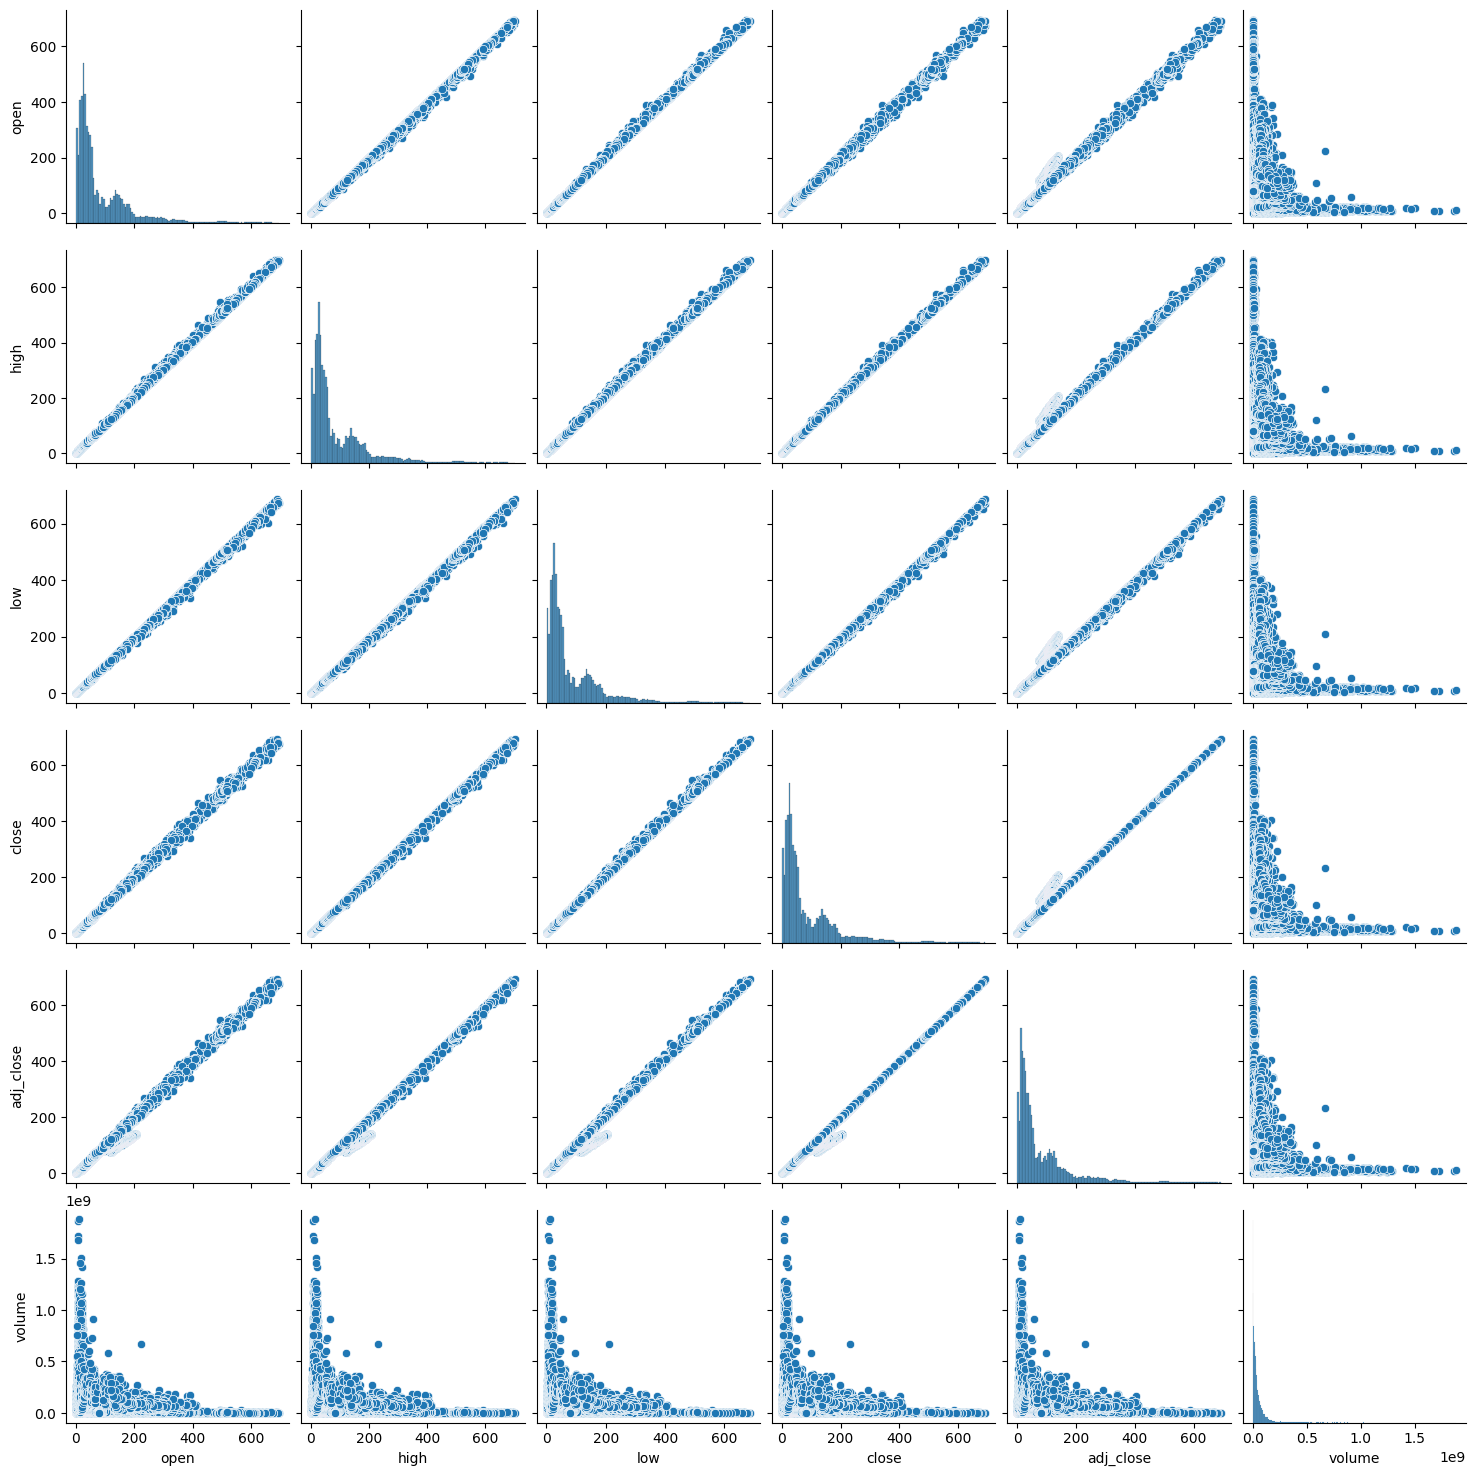

In [ ]:
numerical_data = stock[['open', 'high', 'low', 'close', 'adj_close', 'volume']]

# Create the pair plot
sns.pairplot(numerical_data)

# Display the plot
plt.show()

##Correlation Heatmap

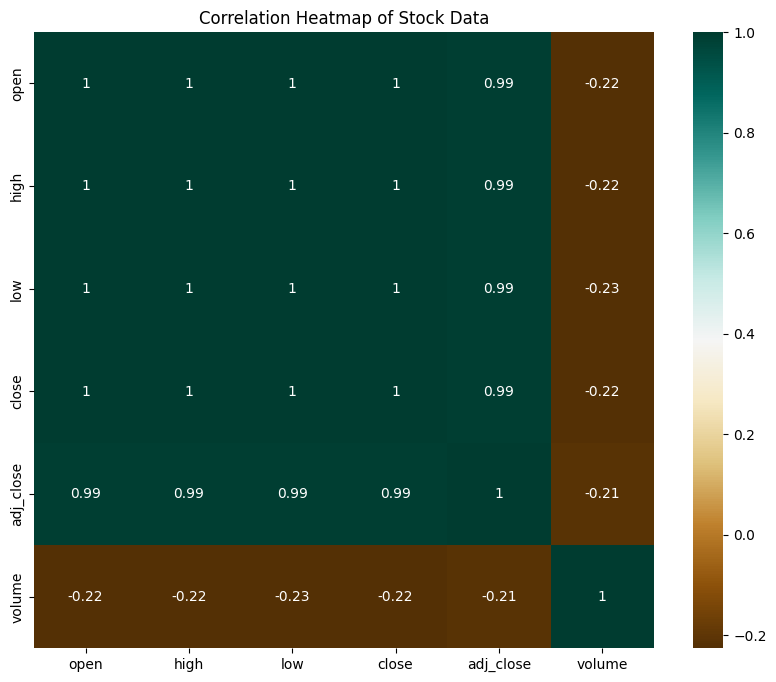

In [ ]:
# Compute the correlation matrix
correlation_matrix = numerical_data.corr()

# Create the heatmap using the BrBG color palette
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='BrBG')

# Improve the visibility of the heatmap
plt.title('Correlation Heatmap of Stock Data')

# Display the heatmap
plt.show()

##Checking for Outliers


Descriptive Statistics:
               open          high           low         close     adj_close  \
count  45088.000000  45088.000000  45088.000000  45088.000000  45088.000000   
mean      89.266584     90.369825     88.111930     89.271306     85.209631   
std      101.626955    103.001073    100.124399    101.592916    100.995967   
min        1.076000      1.108667      0.998667      1.053333      1.053333   
25%       25.670000     25.930135     25.360001     25.660000     22.076433   
50%       47.930000     48.459999     47.465000     47.970001     45.377333   
75%      128.662502    129.848900    127.253945    128.640609    113.672460   
max      696.280029    700.989990    686.090027    691.690002    691.690002   

             volume  
count  4.508800e+04  
mean   5.297813e+07  
std    9.324730e+07  
min    5.892000e+05  
25%    9.629425e+06  
50%    2.646315e+07  
75%    5.839768e+07  
max    1.880998e+09  


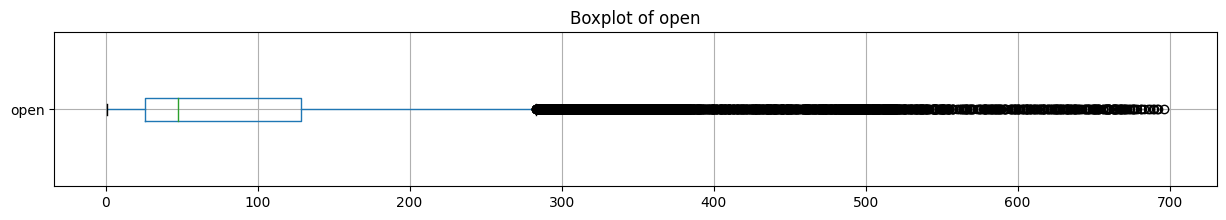

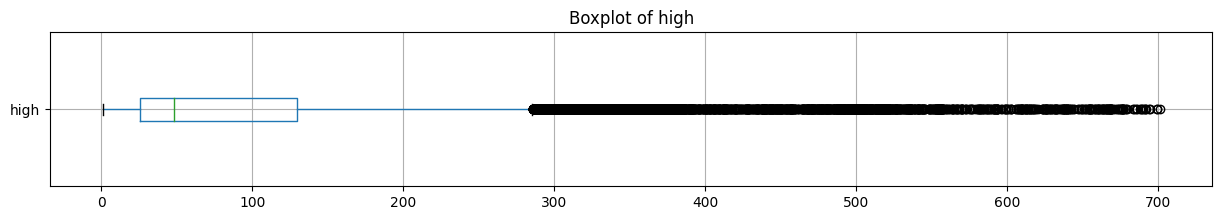

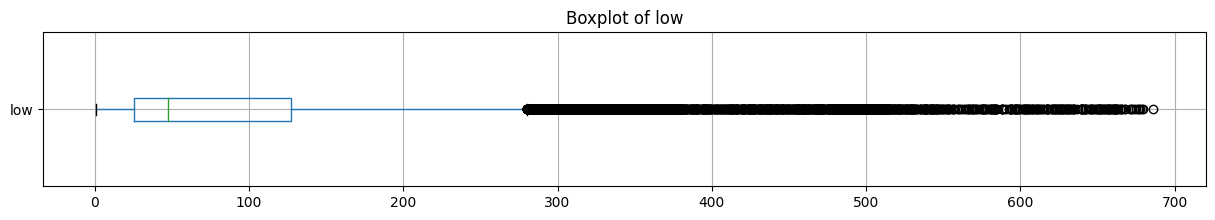

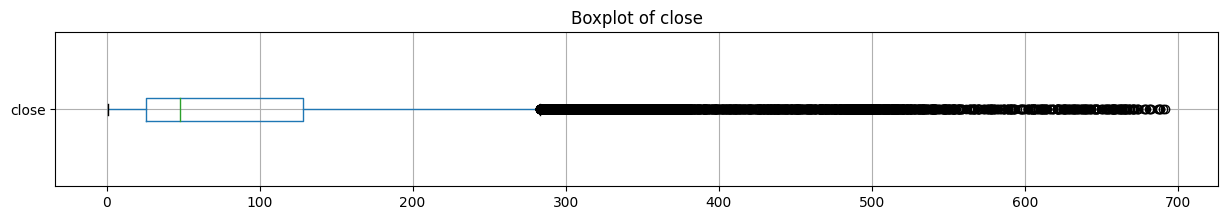

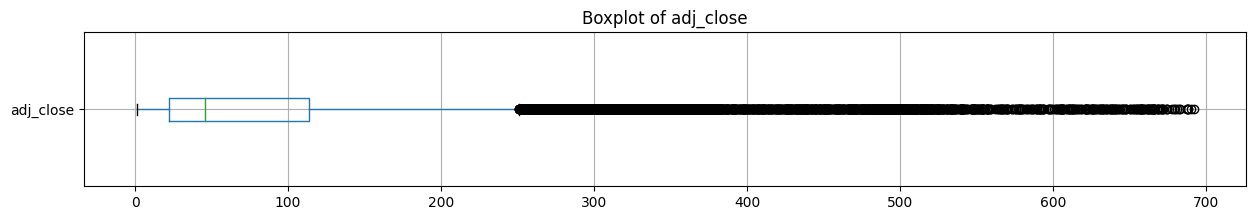

In [ ]:
# Descriptive statistics for numerical columns
print("\nDescriptive Statistics:")
print(stock.describe())

numerical_columns = stock.select_dtypes(include=['float64']).columns

# Visualize outliers using horizontal box plots
for column in numerical_columns:
    plt.figure(figsize=(15, 2))
    stock.boxplot(column=column, vert=False)
    plt.title(f'Boxplot of {column}')
    plt.show()

There are no missing values in the data, however there are considerable number of outliers which are present outside of the boxplot. This indicates that the values are more spread out, and not necessarily within the quantile rangs.

The relationship i will be identifying is between the opening price and th adjusted stock prices.

Hence, the question for this homework will be:

"What are the factors which affect the stock price, and is there any statistically significant relationship between opening price and stock prices for adjusted closing price?"

#Data Preprocessing

##Data cleaning

Since there are no missing values, we will not be performing any imputation techniques like mean or median imputing or model-based methods, or drop rows/columns with missing values.

##Removing outliers

Before Outlier Removal:
               open          high           low         close     adj_close  \
count  45088.000000  45088.000000  45088.000000  45088.000000  45088.000000   
mean      89.266584     90.369825     88.111930     89.271306     85.209631   
std      101.626955    103.001073    100.124399    101.592916    100.995967   
min        1.076000      1.108667      0.998667      1.053333      1.053333   
25%       25.670000     25.930135     25.360001     25.660000     22.076433   
50%       47.930000     48.459999     47.465000     47.970001     45.377333   
75%      128.662502    129.848900    127.253945    128.640609    113.672460   
max      696.280029    700.989990    686.090027    691.690002    691.690002   

             volume  
count  4.508800e+04  
mean   5.297813e+07  
std    9.324730e+07  
min    5.892000e+05  
25%    9.629425e+06  
50%    2.646315e+07  
75%    5.839768e+07  
max    1.880998e+09  

After Outlier Removal:
               open          high         

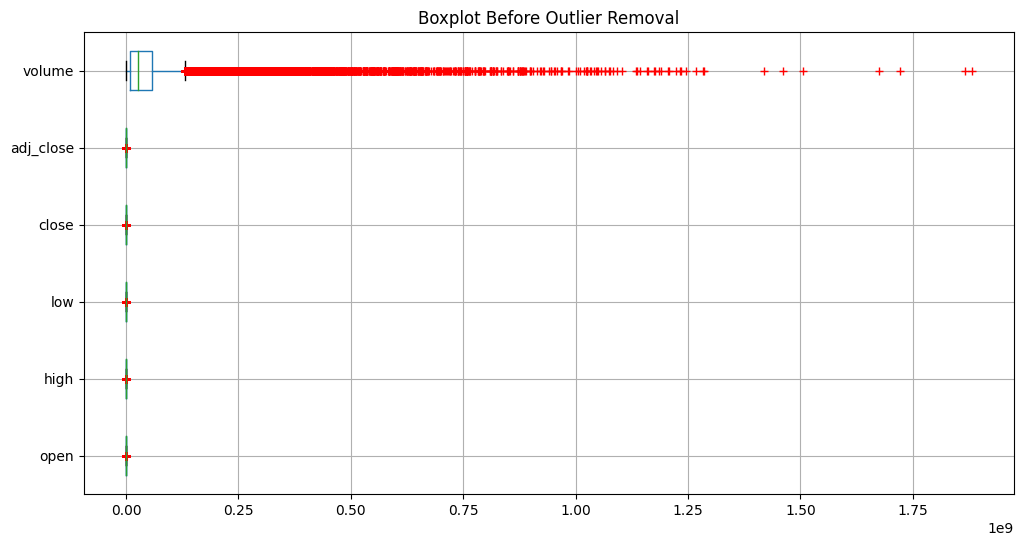

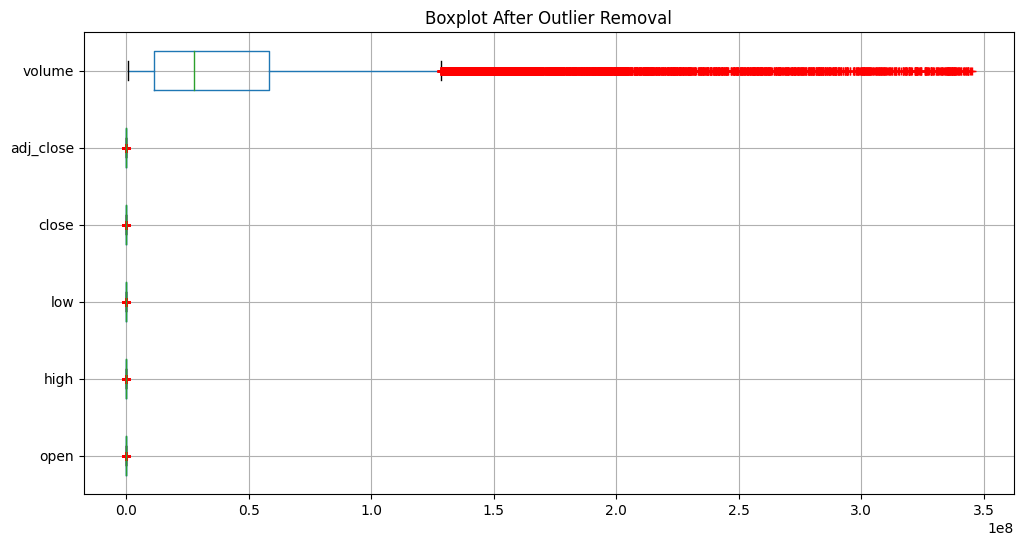

In [ ]:
# Display basic statistics before outlier removal
print("Before Outlier Removal:")
print(stock.describe())

# Define the columns to check for outliers
columns_to_check = ['open', 'high', 'low', 'close', 'adj_close', 'volume']

# Set the z-score threshold for identifying outliers
z_score_threshold = 3

# Function to remove outliers based on z-scores
def remove_outliers(data, columns, threshold):
    for column in columns:
        z_scores = np.abs((data[column] - data[column].mean()) / data[column].std())
        data = data[(z_scores <= threshold)]
    return data

# Remove outliers
stock_cleaned = remove_outliers(stock, columns_to_check, z_score_threshold)

# Display basic statistics after outlier removal
print("\nAfter Outlier Removal:")
print(stock_cleaned.describe())

# Columns to plot
columns_to_plot = ['open', 'high', 'low', 'close', 'adj_close', 'volume']

# Create boxplots before outlier removal
plt.figure(figsize=(12, 6))
stock[columns_to_plot].boxplot(sym='r+', vert=False)
plt.title('Boxplot Before Outlier Removal')
plt.show()

# Create boxplots after outlier removal
plt.figure(figsize=(12, 6))
stock_cleaned[columns_to_plot].boxplot(sym='r+', vert=False)
plt.title('Boxplot After Outlier Removal')
plt.show()

##Principal Component Analysis

Not using pca

(feature engineering) maybe

#

##Time Series